# **This SALES ANALYSIS project is divided into four main sections:**
1. Data Wrangling,
2. Data Analysis,
3. Data Visualization, and
4. Report Generation.



# **STEP 1: Data Wrangling**

1.1 Import Libraries and Load Data

In [1]:
# Mount Google Drive to access dataset
from google.colab import drive
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define dataset path (Modify as per your folder structure)
zip_path = '/content/drive/My Drive/SALES ANALYSIS - SIMPLILEARN/DATA_SET/sales_dataset.zip'
extract_path = '/content/data'

In [4]:
# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
# Identify extracted CSV file
csv_file = os.path.join(extract_path, 'AusApparalSales4thQrt2020.csv')

In [6]:
# Load dataset
df = pd.read_csv(csv_file)

In [7]:
# Create a cleaned version of the DataFrame
df_cleaned = df.copy()  # Start with a copy of the original data

In [8]:
print(df_cleaned.columns)

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [9]:
# Display the first 5 rows of the dataset
print(df_cleaned.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [10]:

# Display the first 5 rows of the dataset
print(df_cleaned.tail())

             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500


In [11]:
# Check for incorrect entries (e.g., negative sales or units)
print(df_cleaned.describe())  # Look for anomalies in numerical columns

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


1.2 Inspect Data for Missing or Incorrect Entries

In [12]:
# Inspect missing values
print("Missing values:\n", df_cleaned.isna().sum())

Missing values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [13]:
# Filter rows where 'Sales' and 'Unit' are not missing
df_non_missing = df_cleaned[df_cleaned['Sales'].notna() & df_cleaned['Unit'].notna()]

# Display the filtered DataFrame
print(df_non_missing.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [14]:
# Count non-missing values in each column
print(df_cleaned.notna().sum())

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


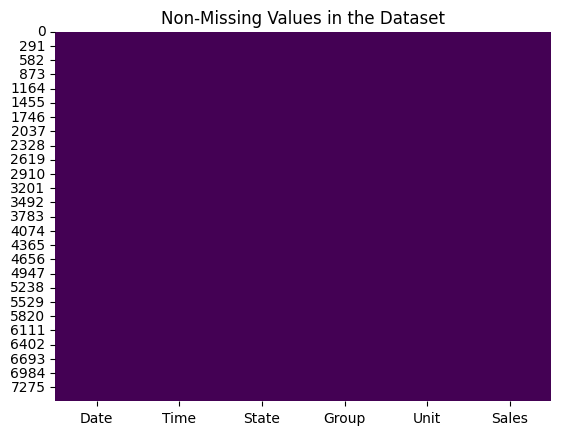

In [15]:
# Visualize missing data
sns.heatmap(df_cleaned.notna(), cbar=False, cmap='viridis')
plt.title('Non-Missing Values in the Dataset')
plt.show()

## Data Wrangling: Handling Missing Values

### 1. Checking for Missing Values
- The dataset was inspected for missing values using the `isna()` and `notna()` functions.
- No missing values were found in any of the columns.

### 2. Conclusion
- Since the dataset is complete, no further action was required to handle missing values.

In [16]:
# Descriptive statistics for numerical columns
print(df[['Sales', 'Unit']].describe())

               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


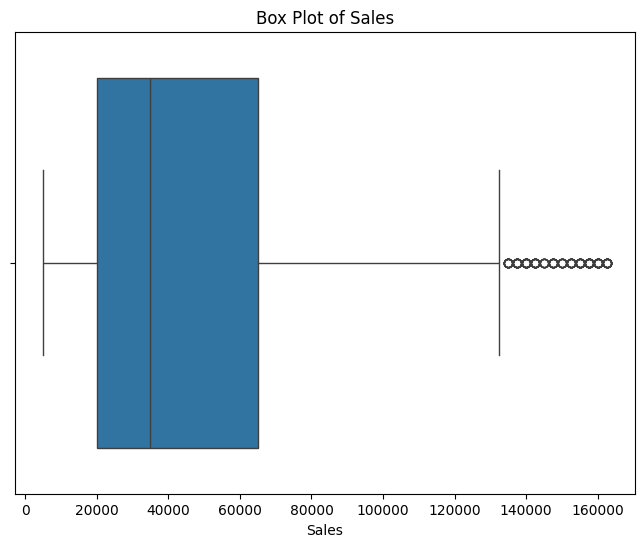

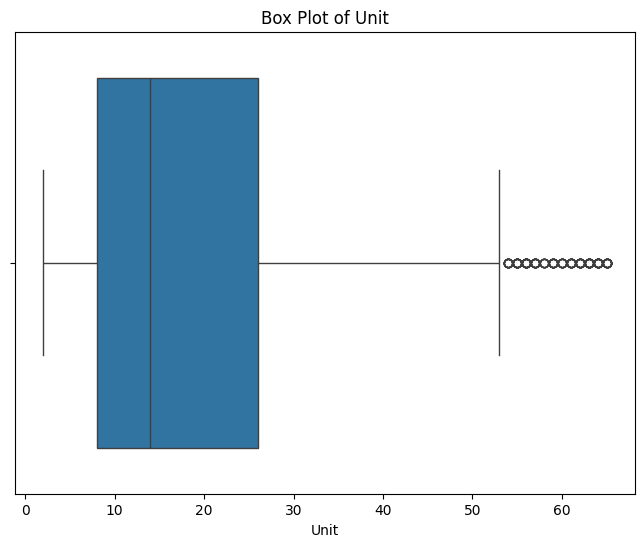

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# Box plot for 'Units'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Unit'])
plt.title('Box Plot of Unit')
plt.show()

In [18]:
# Remove Outliers
# Calculate IQR (Interquartile Range)
#Use the IQR method to identify and remove outliers.

# Calculate IQR for 'Sales'
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Define outlier bounds for 'Sales'
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Filter rows where 'Sales' is within the bounds
df_cleaned = df[(df['Sales'] >= lower_bound_sales) & (df['Sales'] <= upper_bound_sales)]

# Display the cleaned DataFrame
print("DataFrame after removing 'Sales' outliers:")
print(df_cleaned.head())




DataFrame after removing 'Sales' outliers:
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [19]:
#Remove Outliers for 'Units' (Optional)
#If the Units column also has outliers, you can remove them similarly.

# Calculate IQR for 'Units'
Q1_units = df['Unit'].quantile(0.25)
Q3_units = df['Unit'].quantile(0.75)
IQR_units = Q3_units - Q1_units

# Define outlier bounds for 'Units'
lower_bound_units = Q1_units - 1.5 * IQR_units
upper_bound_units = Q3_units + 1.5 * IQR_units

# Filter rows where 'Units' is within the bounds
df_cleaned = df_cleaned[(df_cleaned['Unit'] >= lower_bound_units) & (df_cleaned['Unit'] <= upper_bound_units)]

# Display the cleaned DataFrame
print("DataFrame after removing 'Unit' outliers:")
print(df_cleaned.head())


DataFrame after removing 'Unit' outliers:
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [20]:
#Correct Incorrect Values
#Replace Negative Sales with 0
#If your dataset contains negative sales values (which are incorrect), replace them with 0 or the mean value.

# Replace negative sales with 0
df_cleaned['Sales'] = df_cleaned['Sales'].apply(lambda x: 0 if x < 0 else x)

# Verify the correction
print("Negative sales replaced with 0:")
print(df_cleaned[df_cleaned['Sales'] == 0])

Negative sales replaced with 0:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


Descriptive Statistics for Cleaned Data:
              Sales         Unit
count    7437.00000  7437.000000
mean    43292.65833    17.317063
std     29565.25541    11.826102
min      5000.00000     2.000000
25%     20000.00000     8.000000
50%     35000.00000    14.000000
75%     62500.00000    25.000000
max    132500.00000    53.000000


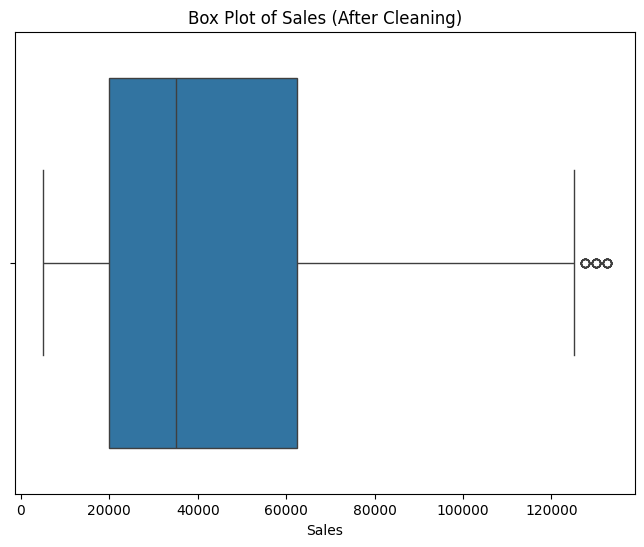

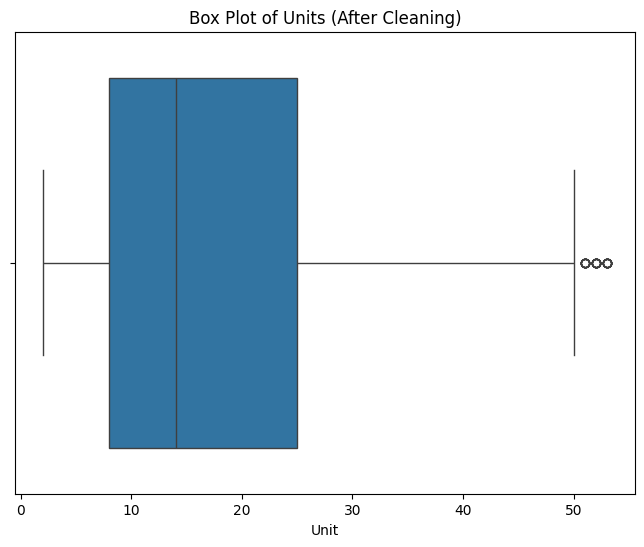

In [21]:
#Verify the Cleaned Data
#After handling outliers and incorrect values, verify the cleaned dataset.
# Descriptive statistics for the cleaned dataset
print("Descriptive Statistics for Cleaned Data:")
print(df_cleaned[['Sales', 'Unit']].describe())

# Box plot for 'Sales' after cleaning
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Sales'])
plt.title('Box Plot of Sales (After Cleaning)')
plt.show()

# Box plot for 'Units' after cleaning
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Unit'])
plt.title('Box Plot of Units (After Cleaning)')
plt.show()

In [22]:
# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('Cleaned_AusApparalSales4thQrt2020.csv', index=False)

# Handling Incorrect Data

### 1. Identifying Outliers
- Outliers were identified using descriptive statistics and box plots.
- The IQR method was used to detect extreme values in the `Sales` and `Units` columns.

### 2. Removing Outliers
- Rows with `Sales` or `Units` values outside the range `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` were removed.


In [23]:
# Check for duplicates
print("Number of duplicates:", df_cleaned.duplicated().sum())

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

Number of duplicates: 0


In [24]:
# Check data types
print(df_cleaned.dtypes)

# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%b-%Y')

# Verify the conversion
print(df_cleaned['Date'].dtype)  # Should output: datetime64[ns]

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object
datetime64[ns]


1.3 Normalize the Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'Sales' and 'Units' columns
scaler = MinMaxScaler()
df_cleaned[['Sales', 'Unit']] = scaler.fit_transform(df_cleaned[['Sales', 'Unit']])

# Display the normalized data
print(df_cleaned.head())

        Date        Time State     Group      Unit     Sales
0 2020-10-01     Morning    WA      Kids  0.117647  0.117647
1 2020-10-01     Morning    WA       Men  0.117647  0.117647
2 2020-10-01     Morning    WA     Women  0.039216  0.039216
3 2020-10-01     Morning    WA   Seniors  0.254902  0.254902
4 2020-10-01   Afternoon    WA      Kids  0.019608  0.019608


In [26]:
# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%b-%Y')

# Verify the conversion
print(df_cleaned['Date'].head())

0   2020-10-01
1   2020-10-01
2   2020-10-01
3   2020-10-01
4   2020-10-01
Name: Date, dtype: datetime64[ns]


In [27]:
# Extract day of the week, month, and quarter
df_cleaned['Day_of_Week'] = df_cleaned['Date'].dt.day_name()
df_cleaned['Month'] = df_cleaned['Date'].dt.month_name()
df_cleaned['Quarter'] = df_cleaned['Date'].dt.quarter

# Display the updated DataFrame
print(df_cleaned.head())

        Date        Time State     Group      Unit     Sales Day_of_Week  \
0 2020-10-01     Morning    WA      Kids  0.117647  0.117647    Thursday   
1 2020-10-01     Morning    WA       Men  0.117647  0.117647    Thursday   
2 2020-10-01     Morning    WA     Women  0.039216  0.039216    Thursday   
3 2020-10-01     Morning    WA   Seniors  0.254902  0.254902    Thursday   
4 2020-10-01   Afternoon    WA      Kids  0.019608  0.019608    Thursday   

     Month  Quarter  
0  October        4  
1  October        4  
2  October        4  
3  October        4  
4  October        4  


1.4 Apply GroupBy() for Data Analysis

In [28]:
# Group by 'State' and 'Demographic Group' to analyze sales
grouped_data = df_cleaned.groupby(['State', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()

# Display the grouped data
print(grouped_data)

   State     Group       Sales        Unit
0    NSW      Kids  135.196078  135.196078
1    NSW       Men  138.607843  138.607843
2    NSW   Seniors  132.058824  132.058824
3    NSW     Women  139.784314  139.784314
4     NT      Kids   34.117647   34.117647
5     NT       Men   34.607843   34.607843
6     NT   Seniors   32.274510   32.274510
7     NT     Women   33.745098   33.745098
8    QLD      Kids   56.156863   56.156863
9    QLD       Men   55.235294   55.235294
10   QLD   Seniors   53.647059   53.647059
11   QLD     Women   54.705882   54.705882
12    SA      Kids  103.254902  103.254902
13    SA       Men  104.352941  104.352941
14    SA   Seniors  104.843137  104.843137
15    SA     Women  106.823529  106.823529
16   TAS      Kids   34.705882   34.705882
17   TAS       Men   34.568627   34.568627
18   TAS   Seniors   33.725490   33.725490
19   TAS     Women   33.156863   33.156863
20   VIC      Kids  168.078431  168.078431
21   VIC       Men  162.921569  162.921569
22   VIC   

In [29]:
# Group by 'State' and calculate total sales
state_sales = df_cleaned.groupby('State')['Sales'].sum().reset_index()

# Display the result
print(state_sales)

  State       Sales
0   NSW  545.647059
1    NT  134.745098
2   QLD  219.745098
3    SA  419.274510
4   TAS  136.156863
5   VIC  646.627451
6    WA  131.392157


In [30]:
# Create a pivot table for sales by State and Group
pivot_table = df_cleaned.pivot_table(values='Sales', index='State', columns='Group', aggfunc='sum')

# Display the pivot table
print(pivot_table)

Group        Kids         Men     Seniors       Women
State                                                
NSW    135.196078  138.607843  132.058824  139.784314
NT      34.117647   34.607843   32.274510   33.745098
QLD     56.156863   55.235294   53.647059   54.705882
SA     103.254902  104.352941  104.843137  106.823529
TAS     34.705882   34.568627   33.725490   33.156863
VIC    168.078431  162.921569  154.941176  160.686275
WA      33.529412   34.529412   32.647059   30.686275


# **STEP 2: Data Analysis**

2.1 Descriptive Statistical Analysis

In [31]:
# Descriptive statistics for 'Sales' and 'Units'
print(df_cleaned[['Sales', 'Unit']].describe())

# Additional statistics
print("Mean Sales:", df_cleaned['Sales'].mean())
print("Median Sales:", df_cleaned['Sales'].median())
print("Mode Sales:", df_cleaned['Sales'].mode()[0])
print("Standard Deviation of Sales:", df_cleaned['Sales'].std())

             Sales         Unit
count  7437.000000  7437.000000
mean      0.300335     0.300335
std       0.231884     0.231884
min       0.000000     0.000000
25%       0.117647     0.117647
50%       0.235294     0.235294
75%       0.450980     0.450980
max       1.000000     1.000000
Mean Sales: 0.3003345751370335
Median Sales: 0.2352941176470588
Mode Sales: 0.1372549019607843
Standard Deviation of Sales: 0.23188435615977612


2.2 Identify Highest and Lowest Sales Groups

In [32]:
# Group by 'Demographic_Group' and sum the sales
demographic_sales = df_cleaned.groupby('Group')['Sales'].sum().reset_index()

# Identify the group with the highest and lowest sales
highest_sales_group = demographic_sales.loc[demographic_sales['Sales'].idxmax()]
lowest_sales_group = demographic_sales.loc[demographic_sales['Sales'].idxmin()]

print("Highest Sales Group:", highest_sales_group)
print("Lowest Sales Group:", lowest_sales_group)

Highest Sales Group: Group          Kids
Sales    565.039216
Name: 0, dtype: object
Lowest Sales Group: Group       Seniors
Sales    544.137255
Name: 2, dtype: object


2.3 Generate Weekly, Monthly, and Quarterly Reports

In [33]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Weekly report
weekly_report = df_cleaned.resample('W', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})

# Monthly report
monthly_report = df_cleaned.resample('M', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})

# Quarterly report
quarterly_report = df_cleaned.resample('Q', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})

print("Weekly Report:\n", weekly_report)
print("Monthly Report:\n", monthly_report)
print("Quarterly Report:\n", quarterly_report)

Weekly Report:
                  Sales        Unit
Date                              
2020-10-04  104.823529  104.823529
2020-10-11  188.725490  188.725490
2020-10-18  185.882353  185.882353
2020-10-25  187.254902  187.254902
2020-11-01  151.274510  151.274510
2020-11-08  140.588235  140.588235
2020-11-15  143.000000  143.000000
2020-11-22  142.529412  142.529412
2020-11-29  145.392157  145.392157
2020-12-06  185.627451  185.627451
2020-12-13  193.725490  193.725490
2020-12-20  196.549020  196.549020
2020-12-27  183.509804  183.509804
2021-01-03   84.705882   84.705882
Monthly Report:
                  Sales        Unit
Date                              
2020-10-31  797.568627  797.568627
2020-11-30  612.411765  612.411765
2020-12-31  823.607843  823.607843
Quarterly Report:
                   Sales         Unit
Date                                
2020-12-31  2233.588235  2233.588235


<ipython-input-33-42a71f74c2ff>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_report = df_cleaned.resample('M', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})
<ipython-input-33-42a71f74c2ff>:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = df_cleaned.resample('Q', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})


# **Step 3: Data Visualization**

3.1 State-wise Sales Analysis

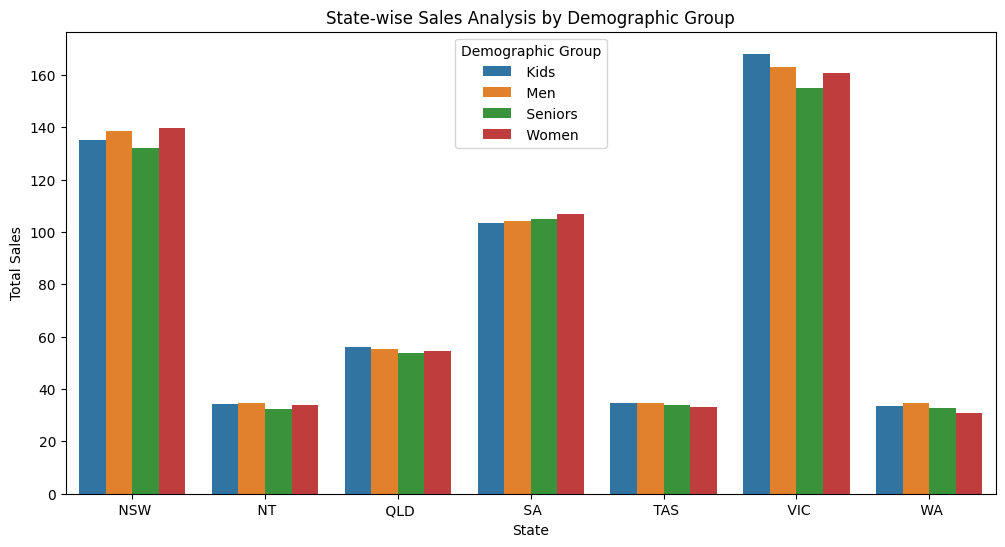

In [34]:
# State-wise sales analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=grouped_data)
plt.title('State-wise Sales Analysis by Demographic Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Demographic Group')
plt.show()

3.2 Group-wise Sales Analysis

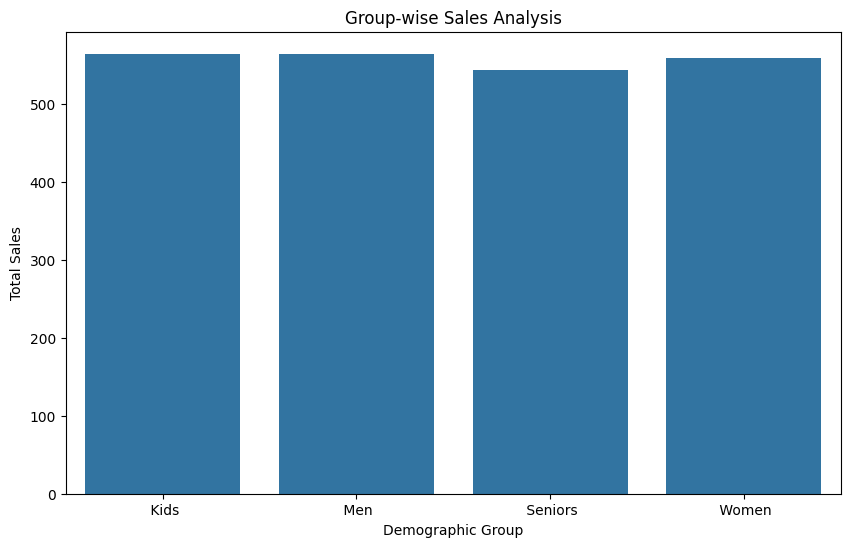

In [35]:
# Group-wise sales analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', data=demographic_sales)
plt.title('Group-wise Sales Analysis')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales')
plt.show()

Prepare the Data
Before creating the dashboard, ensure the data is ready for analysis. This includes:

Converting the Date column to a datetime format.

Extracting daily, weekly, monthly, and quarterly data.

In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Cleaned_AusApparalSales4thQrt2020.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Extract day, week, month, and quarter from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week  # Extract week number
df['Month'] = df['Date'].dt.month_name()  # Extract month name
df['Quarter'] = df['Date'].dt.quarter  # Extract quarter

# Display the updated DataFrame
print(df.head())

        Date        Time State     Group  Unit  Sales  Day  Week    Month  \
0 2020-10-01     Morning    WA      Kids     8  20000    1    40  October   
1 2020-10-01     Morning    WA       Men     8  20000    1    40  October   
2 2020-10-01     Morning    WA     Women     4  10000    1    40  October   
3 2020-10-01     Morning    WA   Seniors    15  37500    1    40  October   
4 2020-10-01   Afternoon    WA      Kids     3   7500    1    40  October   

   Quarter  
0        4  
1        4  
2        4  
3        4  
4        4  


Create Daily, Weekly, Monthly, and Quarterly Charts
We’ll create a dashboard with the following visualizations:

Daily Sales: Line plot of daily sales.

Weekly Sales: Bar plot of weekly sales.

Monthly Sales: Bar plot of monthly sales.

Quarterly Sales: Bar plot of quarterly sales.

2.1 Daily Sales (Line Plot)

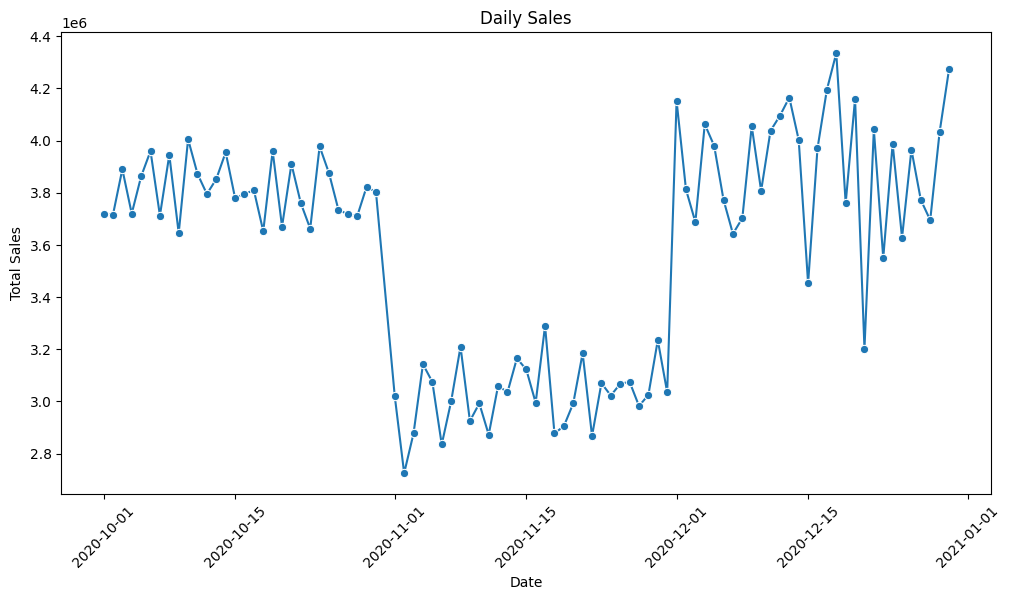

In [37]:
# Group by 'Date' and calculate total daily sales
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Plot daily sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=daily_sales, marker='o')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-a6d33b407f85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Week', y='Sales', data=weekly_sales, palette='viridis')


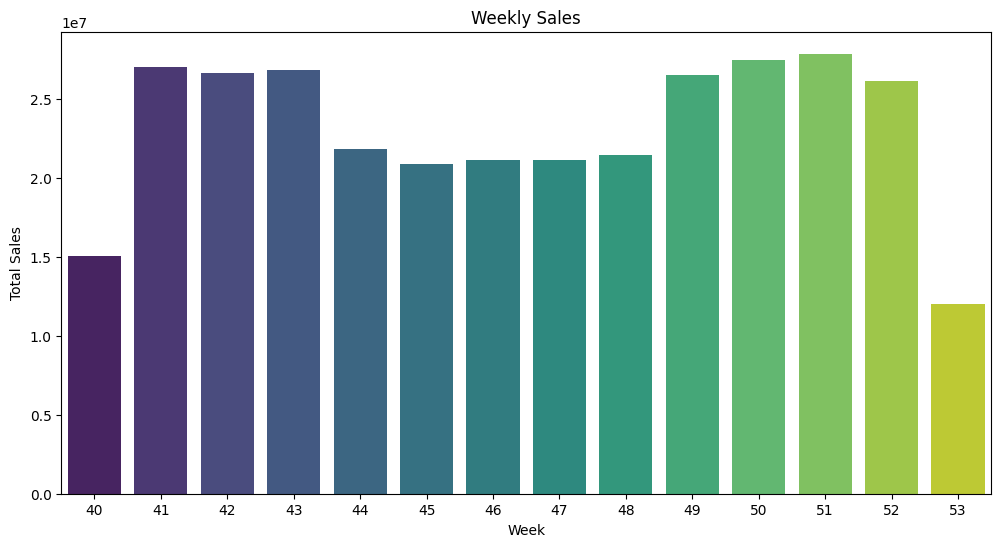

In [38]:
# Group by 'Week' and calculate total weekly sales
weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()

# Plot weekly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Week', y='Sales', data=weekly_sales, palette='viridis')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-39-c00f21d51bd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='viridis')


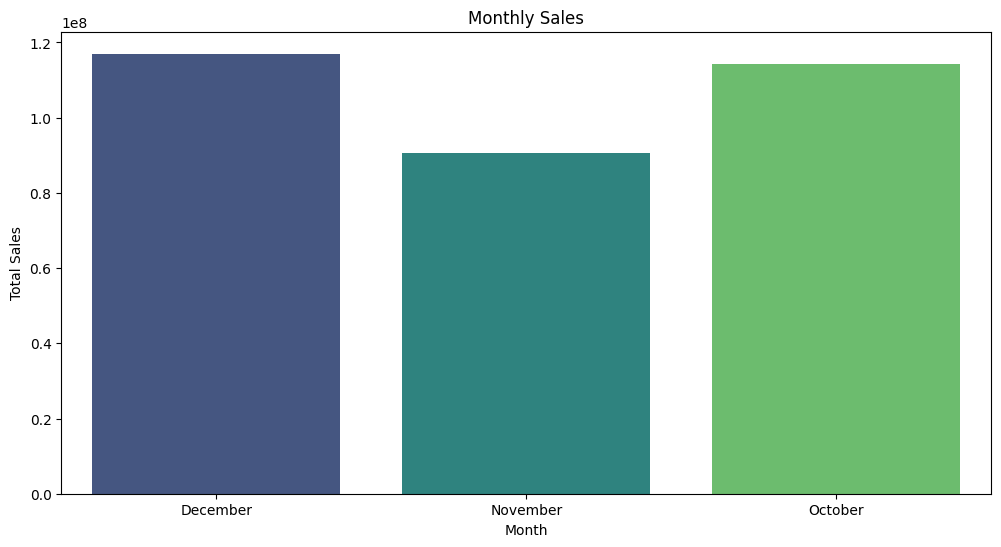

In [39]:
# Group by 'Month' and calculate total monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='viridis')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-40-475d3d6667ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Sales', data=quarterly_sales, palette='viridis')


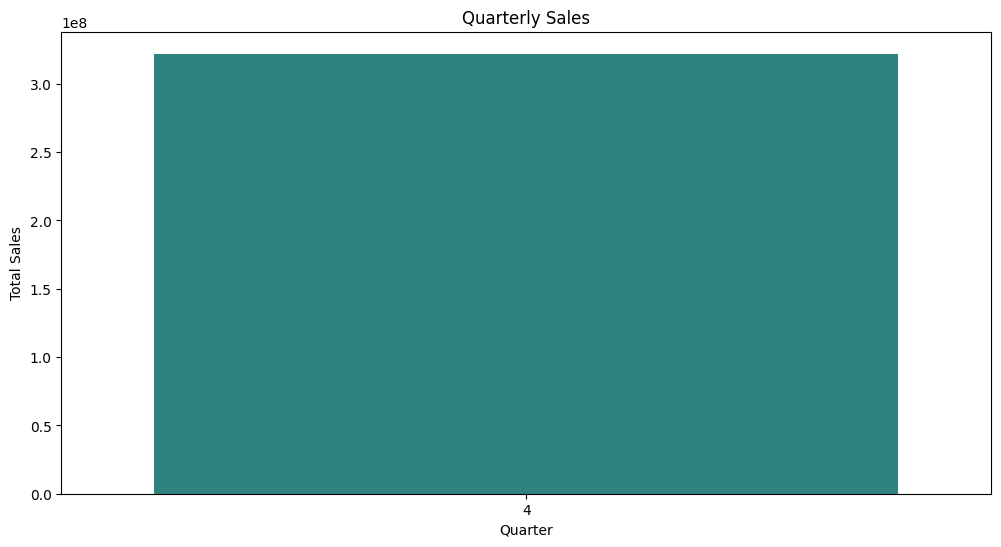

In [40]:
# Group by 'Quarter' and calculate total quarterly sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()

# Plot quarterly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Quarter', y='Sales', data=quarterly_sales, palette='viridis')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-41-77b89d7e4b3b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Week', y='Sales', data=weekly_sales, palette='viridis', ax=axes[0, 1])
<ipython-input-41-77b89d7e4b3b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='viridis', ax=axes[1, 0])
<ipython-input-41-77b89d7e4b3b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Sales', data=quarterly_sales, palette='viridis', ax=axes[1, 1])


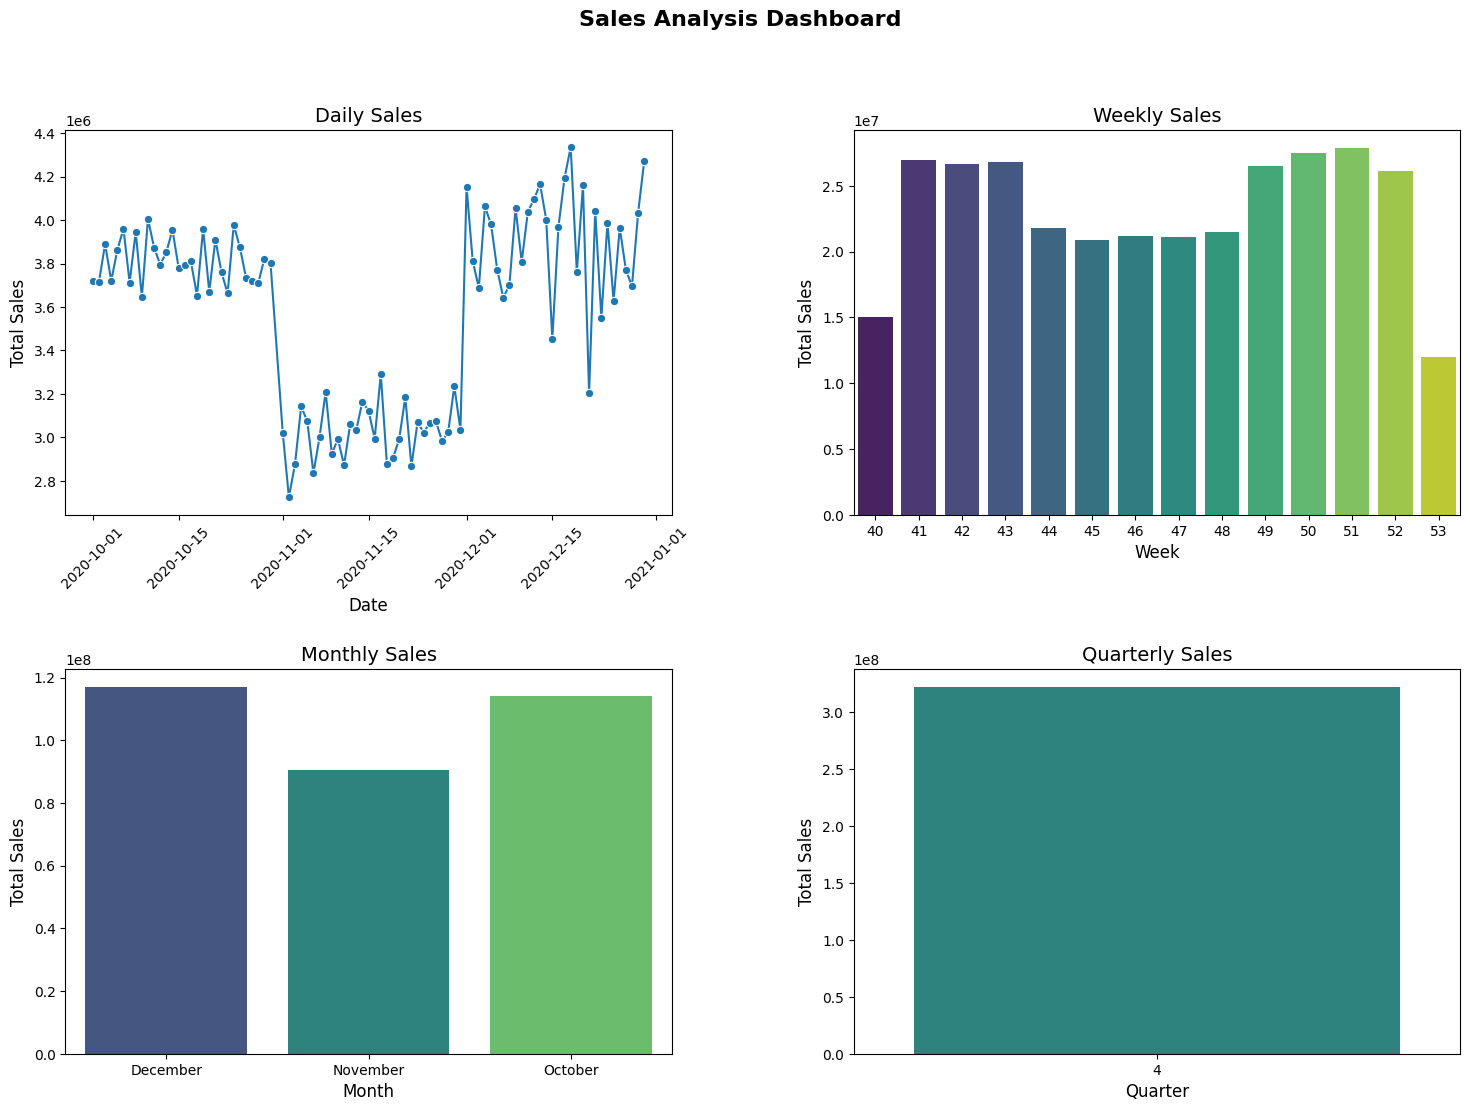

In [41]:
#Step 3: Combine Visualizations into a Dashboard
#Use plt.subplots() to create a 2x2 grid for the dashboard.
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- Plot 1: Daily Sales ---
sns.lineplot(x='Date', y='Sales', data=daily_sales, marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Daily Sales', fontsize=14)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Total Sales', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# --- Plot 2: Weekly Sales ---
sns.barplot(x='Week', y='Sales', data=weekly_sales, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Weekly Sales', fontsize=14)
axes[0, 1].set_xlabel('Week', fontsize=12)
axes[0, 1].set_ylabel('Total Sales', fontsize=12)

# --- Plot 3: Monthly Sales ---
sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Sales', fontsize=14)
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Total Sales', fontsize=12)

# --- Plot 4: Quarterly Sales ---
sns.barplot(x='Quarter', y='Sales', data=quarterly_sales, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Quarterly Sales', fontsize=14)
axes[1, 1].set_xlabel('Quarter', fontsize=12)
axes[1, 1].set_ylabel('Total Sales', fontsize=12)

# Display the dashboard
plt.show()

3.3 Time-of-the-Day Analysis

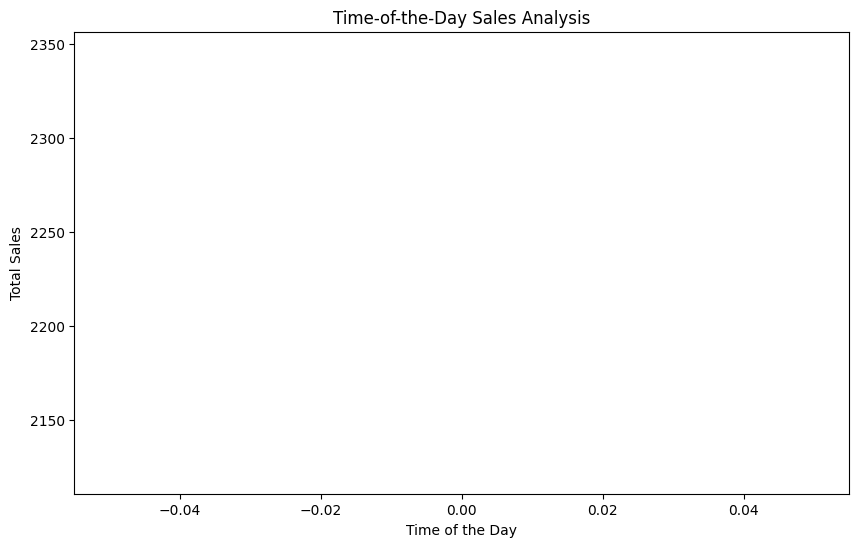

In [42]:
# Extract hour from 'Date' column
df_cleaned['Time'] = df_cleaned['Date'].dt.hour

# Time-of-the-day analysis
hourly_sales = df_cleaned.groupby('Time')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Sales', data=hourly_sales)
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

In [43]:
# Ensure the Time Column is Clean

# Check unique values in the 'Time' column
print(df['Time'].unique())

[' Morning' ' Afternoon' ' Evening']


Aggregate Sales by Time of Day

Group the data by the Time column and calculate the total sales for each time period.

In [44]:
# Group by 'Time' and calculate total sales
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

# Display the result
print(time_sales)

         Time      Sales
0   Afternoon  107175000
1     Evening  106125000
2     Morning  108667500


Visualize Time-of-the-Day Sales

3.1 Bar Plot for Time-of-the-Day Sales

Use a bar plot to visualize total sales for each time period.

<ipython-input-45-007acf622125>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')


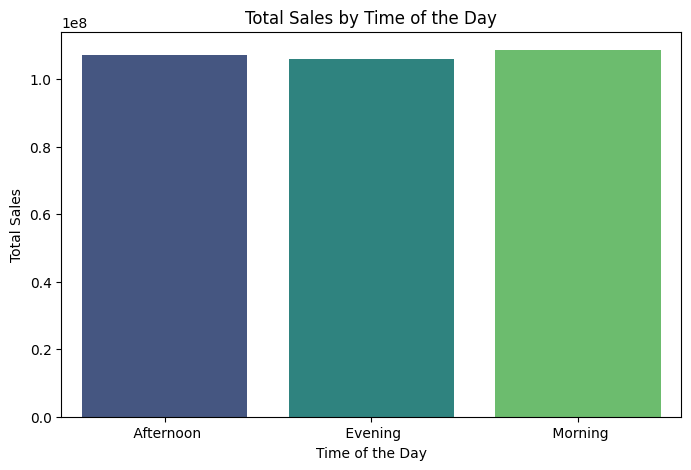

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for time-of-the-day sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')
plt.title('Total Sales by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

3.2 Line Plot for Time-of-the-Day Sales

Use a line plot to show trends in sales across different times of the day.

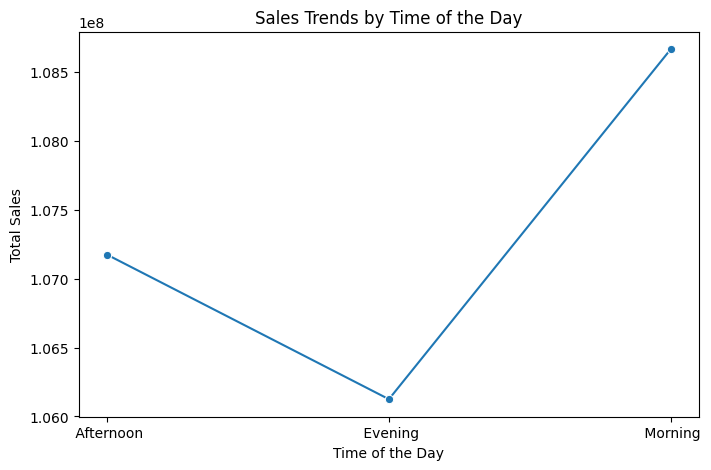

In [46]:
# Line plot for time-of-the-day sales
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Sales', data=time_sales, marker='o')
plt.title('Sales Trends by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

Analyze Peak and Off-Peak Sales

 Identify Peak and Off-Peak Times

Determine which time periods have the highest and lowest sales.

In [47]:
# Identify peak and off-peak times
peak_time = time_sales.loc[time_sales['Sales'].idxmax()]
off_peak_time = time_sales.loc[time_sales['Sales'].idxmin()]

print("Peak Time:", peak_time)
print("Off-Peak Time:", off_peak_time)

Peak Time: Time       Morning
Sales    108667500
Name: 2, dtype: object
Off-Peak Time: Time       Evening
Sales    106125000
Name: 1, dtype: object


Highlight Peak and Off-Peak Times in Visualization
Highlight the peak and off-peak times in your bar plot.

<ipython-input-48-10c872491309>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')


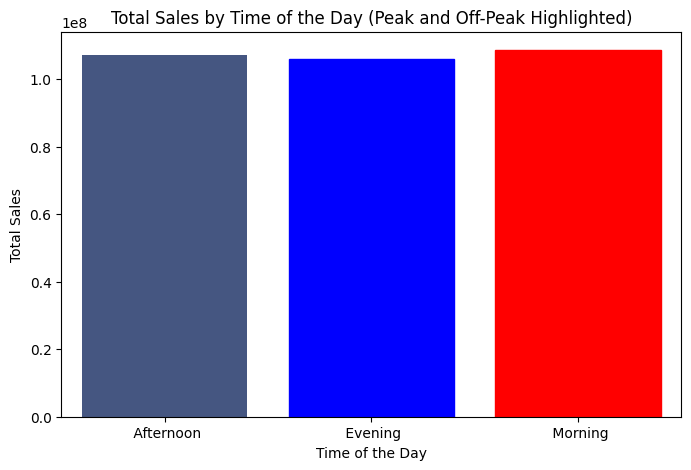

In [48]:
# Bar plot with peak and off-peak times highlighted
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')

# Highlight peak and off-peak times
barplot.patches[time_sales['Sales'].idxmax()].set_color('red')  # Highlight peak time
barplot.patches[time_sales['Sales'].idxmin()].set_color('blue')  # Highlight off-peak time

plt.title('Total Sales by Time of the Day (Peak and Off-Peak Highlighted)')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-49-57eaa47793ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis', ax=axes[0, 0])


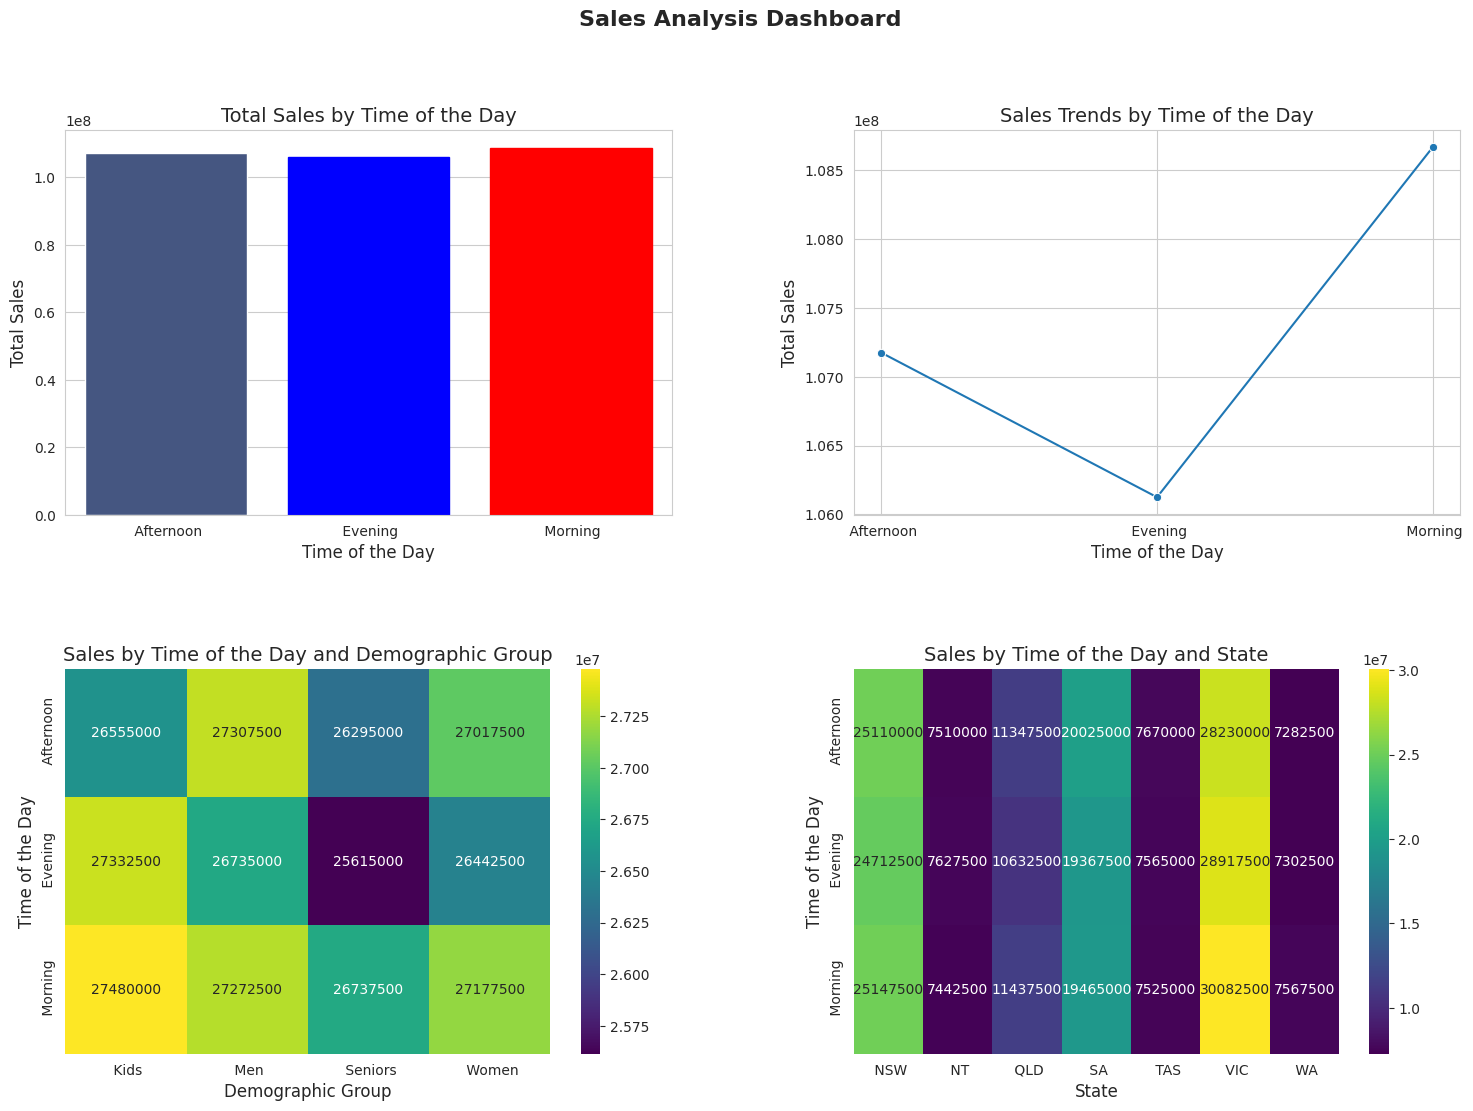

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the dashboard
sns.set_style("whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- Plot 1: Total Sales by Time of the Day (Bar Plot) ---
sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Total Sales by Time of the Day', fontsize=14)
axes[0, 0].set_xlabel('Time of the Day', fontsize=12)
axes[0, 0].set_ylabel('Total Sales', fontsize=12)

# Highlight peak and off-peak times
for i, row in time_sales.iterrows():
    if row['Sales'] == time_sales['Sales'].max():
        axes[0, 0].patches[i].set_color('red')  # Highlight peak time
    elif row['Sales'] == time_sales['Sales'].min():
        axes[0, 0].patches[i].set_color('blue')  # Highlight off-peak time

# --- Plot 2: Sales Trends by Time of the Day (Line Plot) ---
sns.lineplot(x='Time', y='Sales', data=time_sales, marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Sales Trends by Time of the Day', fontsize=14)
axes[0, 1].set_xlabel('Time of the Day', fontsize=12)
axes[0, 1].set_ylabel('Total Sales', fontsize=12)

# --- Plot 3: Sales by Time of the Day and Demographic Group (Heatmap) ---
time_group_sales = df.groupby(['Time', 'Group'])['Sales'].sum().reset_index()
pivot_table_group = time_group_sales.pivot(index='Time', columns='Group', values='Sales')
sns.heatmap(pivot_table_group, annot=True, fmt='.0f', cmap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Sales by Time of the Day and Demographic Group', fontsize=14)
axes[1, 0].set_xlabel('Demographic Group', fontsize=12)
axes[1, 0].set_ylabel('Time of the Day', fontsize=12)

# --- Plot 4: Sales by Time of the Day and State (Heatmap) ---
time_state_sales = df.groupby(['Time', 'State'])['Sales'].sum().reset_index()
pivot_table_state = time_state_sales.pivot(index='Time', columns='State', values='Sales')
sns.heatmap(pivot_table_state, annot=True, fmt='.0f', cmap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Sales by Time of the Day and State', fontsize=14)
axes[1, 1].set_xlabel('State', fontsize=12)
axes[1, 1].set_ylabel('Time of the Day', fontsize=12)

# Display the dashboard
plt.show()

Subplot Grid:

fig, axes = plt.subplots(2, 2, figsize=(18, 12)): Creates a 2x2 grid of subplots with a figure size of 18x12 inches.

axes is a 2D array of subplots, where axes[0, 0] refers to the top-left subplot, axes[0, 1] refers to the top-right subplot, and so on.

Plot 1: Total Sales by Time of the Day:

A bar plot showing total sales for each time period (Morning, Afternoon, Evening).

Peak and off-peak times are highlighted in red and blue, respectively.

Plot 2: Sales Trends by Time of the Day:

A line plot showing the trend of sales across different times of the day.

Plot 3: Sales by Time of the Day and Demographic Group:

A heatmap showing sales for each demographic group (Kids, Men, Women, Seniors) across different times of the day.

Plot 4: Sales by Time of the Day and State:

A heatmap showing sales for each state across different times of the day.

Styling:

sns.set_style("whitegrid"): Sets a clean grid background for the plots.

Titles, labels, and annotations are added to make the dashboard more informative.

Step 4: Save the Dashboard
You can save the dashboard as an image or PDF for sharing:

In [50]:
# Save the dashboard as a PNG file
fig.savefig('Sales_Analysis_Dashboard.png', dpi=300, bbox_inches='tight')

# Save the dashboard as a PDF file
fig.savefig('Sales_Analysis_Dashboard.pdf', bbox_inches='tight')

Step 4: Report Generation
4.1 Use JupyterLab Notebook
Create a JupyterLab notebook and integrate all the above code snippets.

Use Markdown cells to explain each step and provide insights.

4.2 Include Graphs and Plots
Use Box Plots for descriptive statistics:

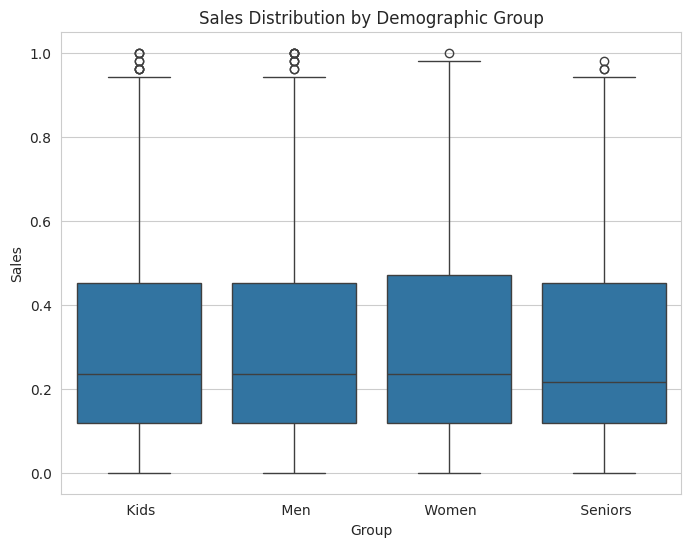

In [51]:
# Box plot for Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Sales', data=df_cleaned)
plt.title('Sales Distribution by Demographic Group')
plt.show()

Use Seaborn Distribution Plot for statistical plotting:

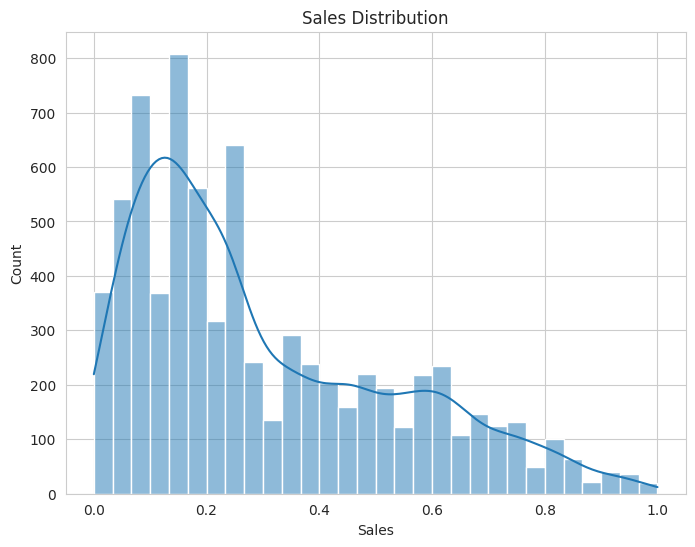

In [52]:
# Distribution plot for Sales
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# **4.3 Final Report Generation**
Summarize findings:

States with the highest and lowest revenues.

Demographic groups contributing the most and least to sales.

Peak and off-peak sales periods.

Provide recommendations for improving sales in low-revenue states.

Identify States Generating the Highest and Lowest Revenues
1.1 Aggregate Sales by State
Group the data by State and calculate the total sales for each state.

In [53]:
# Group by 'State' and calculate total sales
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the states by sales in descending order
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Display the top and bottom states
print("Top 5 States by Sales:")
print(state_sales.head())

print("\nBottom 5 States by Sales:")
print(state_sales.tail())

Top 5 States by Sales:
  State     Sales
5   VIC  87230000
0   NSW  74970000
3    SA  58857500
2   QLD  33417500
4   TAS  22760000

Bottom 5 States by Sales:
  State     Sales
3    SA  58857500
2   QLD  33417500
4   TAS  22760000
1    NT  22580000
6    WA  22152500


Visualize State-wise Sales

Create a bar plot to visualize sales by state

<ipython-input-54-6e615256cd10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')


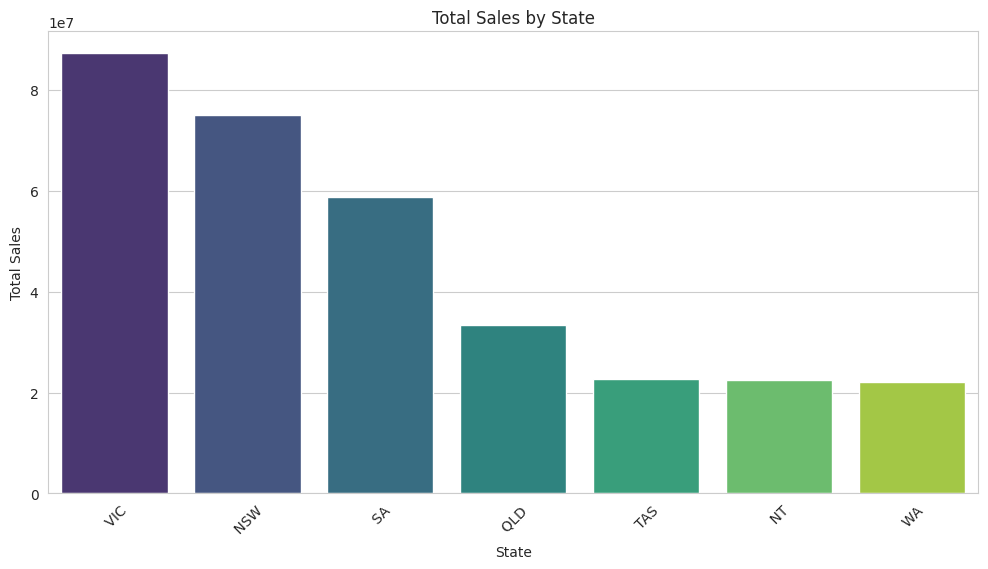

In [54]:
# Bar plot for state-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Develop Sales Programs for States with Lower Revenues

2.1 Identify States with Lower Revenues
Identify the states with the lowest sales (e.g., bottom 5 states).

In [55]:
# Identify the bottom 5 states by sales
bottom_states = state_sales.tail(5)

print("States with Lower Revenues:")
print(bottom_states)

States with Lower Revenues:
  State     Sales
3    SA  58857500
2   QLD  33417500
4   TAS  22760000
1    NT  22580000
6    WA  22152500


Analyze Sales Trends in Low-Revenue States

Analyze sales trends in these states to identify potential issues (e.g., low sales during specific times or for specific demographic groups).

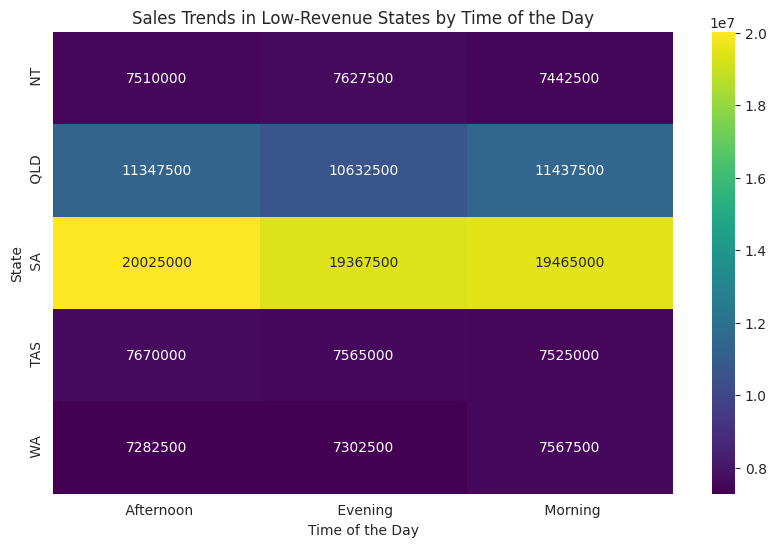

In [56]:
# Filter data for low-revenue states
low_revenue_data = df[df['State'].isin(bottom_states['State'])]

# Group by 'State' and 'Time' to analyze sales trends
low_revenue_time_sales = low_revenue_data.groupby(['State', 'Time'])['Sales'].sum().reset_index()

# Pivot the data for visualization
pivot_table = low_revenue_time_sales.pivot(index='State', columns='Time', values='Sales')

# Heatmap for sales trends in low-revenue states
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
plt.title('Sales Trends in Low-Revenue States by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('State')
plt.show()

Develop Sales Programs for States with Lower Revenues

2.1 Identify States with Lower Revenues
Identify the states with the lowest sales (e.g., bottom 5 states).

In [57]:
# Identify the bottom 5 states by sales
bottom_states = state_sales.tail(5)

print("States with Lower Revenues:")
print(bottom_states)

States with Lower Revenues:
  State     Sales
3    SA  58857500
2   QLD  33417500
4   TAS  22760000
1    NT  22580000
6    WA  22152500


Analyze Sales Trends in Low-Revenue States

Analyze sales trends in these states to identify potential issues (e.g., low sales during specific times or for specific demographic groups).

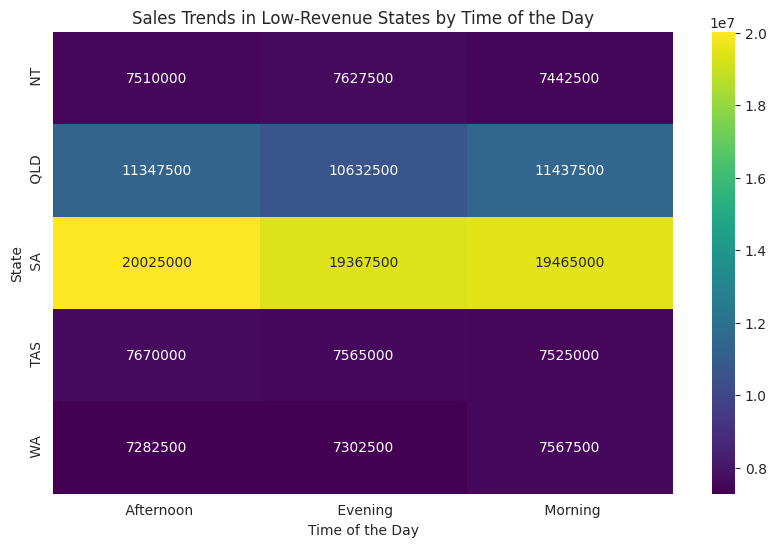

In [58]:
# Filter data for low-revenue states
low_revenue_data = df[df['State'].isin(bottom_states['State'])]

# Group by 'State' and 'Time' to analyze sales trends
low_revenue_time_sales = low_revenue_data.groupby(['State', 'Time'])['Sales'].sum().reset_index()

# Pivot the data for visualization
pivot_table = low_revenue_time_sales.pivot(index='State', columns='Time', values='Sales')

# Heatmap for sales trends in low-revenue states
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
plt.title('Sales Trends in Low-Revenue States by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('State')
plt.show()

Step 3: Generate the Report in JupyterLab Notebook

3.1 Use Markdown for Report Sections

In a JupyterLab Notebook, use Markdown to structure the report. Here’s an example:

# Sales Analysis Report

## 1. States Generating the Highest Revenues

### Top 5 States by Sales
- **State A**: VIC
- **State B**: NSW
- **State C**: SA
- **State D**: QLD
- **State E**: TAS

### Visualization: Total Sales by State
![Total Sales by State](state_sales_plot.png)

---

## 2. Sales Programs for States with Lower Revenues

### States with Lower Revenues
- **State X**: WA
- **State Y**: NT
- **State Z**: TAS



3.2 Include Code and Visualizations

Embed the code and visualizations directly in the notebook. For example:

<ipython-input-59-1b0d46a80d0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')


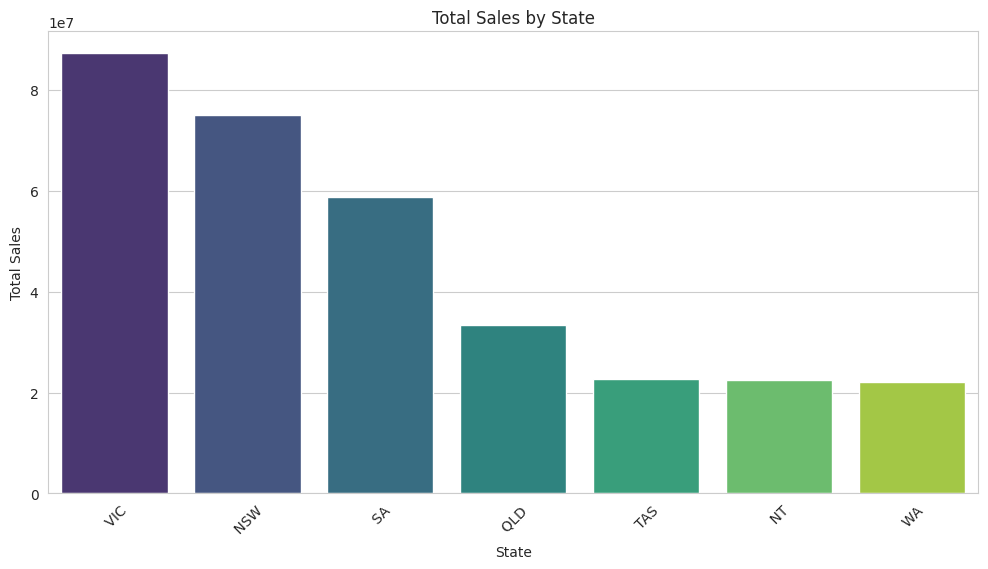

In [59]:
# Code for state-wise sales analysis
state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()